In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [26]:
df = pd.read_csv('estudo_xadrez.csv')
df.head()

,Identificador do Aluno,Nome do Aluno,Idade,Gênero,Ano Escolar,Você pratica xadrez regularmente?,Há quanto tempo você joga xadrez?,Qual foi sua média geral nas últimas três avaliações escolares?,Qual foi sua nota na última prova de Matemática?,Qual foi sua nota na última prova de Língua Portuguesa?
0,1,Tiago Pereira,7,Masculino,2º Ano,Não,Nunca,6.54,9.59,8.34
1,2,Diego Costa,14,Masculino,9º Ano,Não,Nunca,6.40,5.56,8.69
2,3,Elisa Dias,17,Feminino,7º Ano,Não,Nunca,7.48,5.85,8.11
3,4,Rafael Dias,10,Masculino,5º Ano,Não,Nunca,9.91,9.41,6.45
4,5,Laura Júnior,8,Feminino,3º Ano,Sim,mais de 1 ano,5.58,8.63,7.60


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Identificador do Aluno                                           2000 non-null   int64  
 1   Nome do Aluno                                                    2000 non-null   object 
 2   Idade                                                            2000 non-null   int64  
 3   Gênero                                                           2000 non-null   object 
 4   Ano Escolar                                                      2000 non-null   object 
 5   Você pratica xadrez regularmente?                                2000 non-null   object 
 6   Há quanto tempo você joga xadrez?                                2000 non-null   object 
 7   Qual foi sua média geral nas últimas três 

In [28]:
sns.set(style="whitegrid")

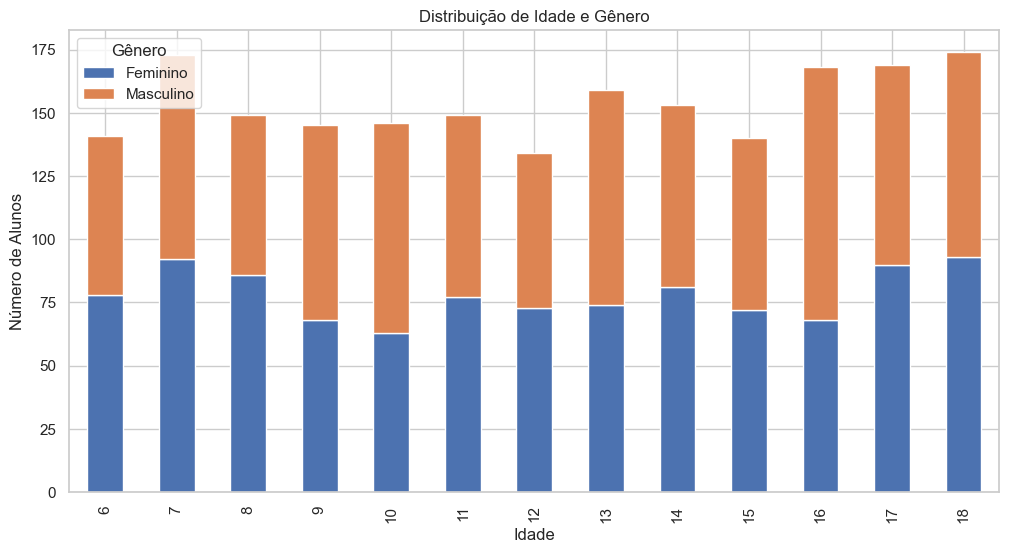

In [29]:
# 1. Distribuição por Idade e Gênero
idade_genero = df.groupby('Idade')['Gênero'].value_counts().unstack().fillna(0)
idade_genero.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de Idade e Gênero')
plt.xlabel('Idade')
plt.ylabel('Número de Alunos')
plt.legend(title='Gênero')
plt.show()

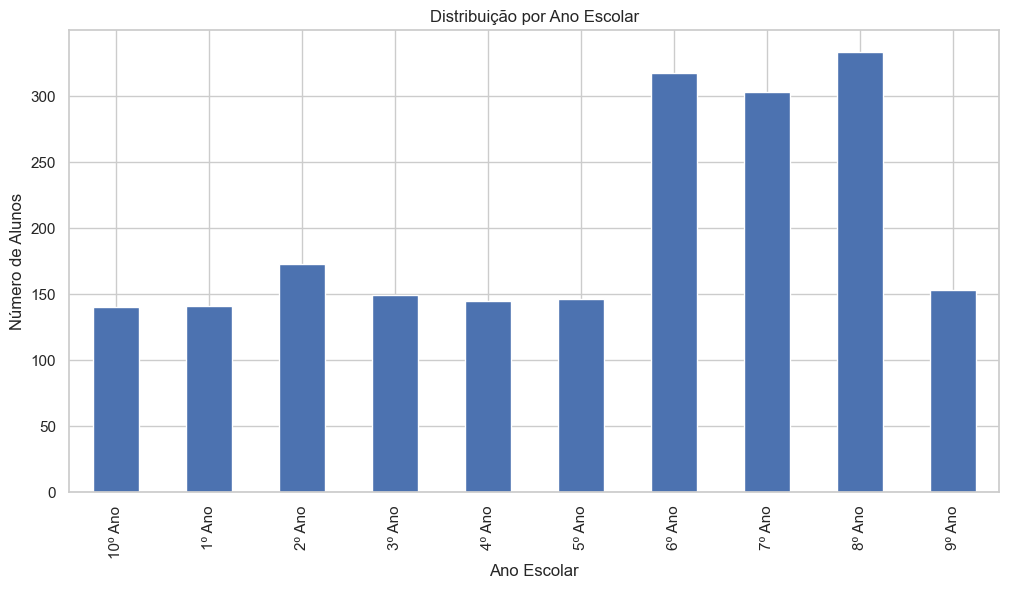

In [30]:
# 2. Distribuição por Ano Escolar
ano_escolar = df['Ano Escolar'].value_counts().sort_index()
ano_escolar.plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição por Ano Escolar')
plt.xlabel('Ano Escolar')
plt.ylabel('Número de Alunos')
plt.show()

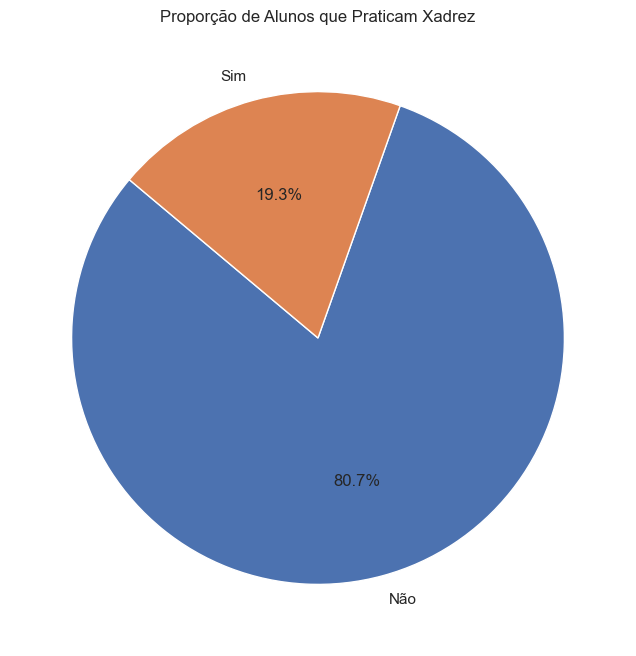

In [31]:
# 3. Prática de Xadrez
pratica_xadrez = df['Você pratica xadrez regularmente?'].value_counts()
pratica_xadrez.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title('Proporção de Alunos que Praticam Xadrez')
plt.ylabel('')
plt.show()

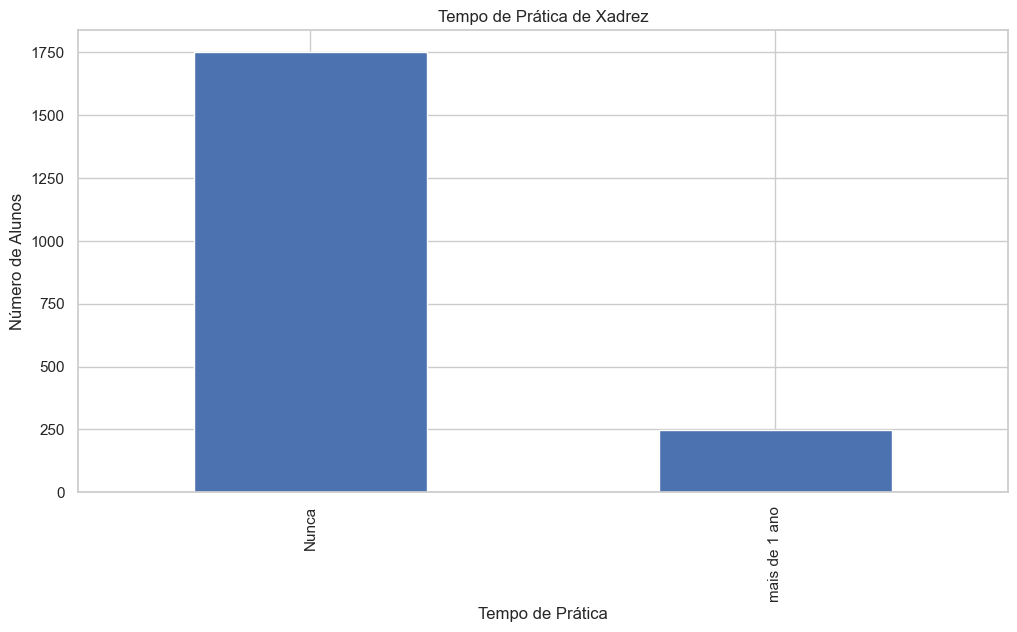

In [32]:
# 4. Tempo que os Alunos Praticam Xadrez
tempo_pratica = df['Há quanto tempo você joga xadrez?'].value_counts()
tempo_pratica.plot(kind='bar', figsize=(12, 6))
plt.title('Tempo de Prática de Xadrez')
plt.xlabel('Tempo de Prática')
plt.ylabel('Número de Alunos')
plt.show()


# Correlação entre prática de xadrez e desempenho escolar

In [43]:
# Converter a coluna 'Você pratica xadrez regularmente?' para valores binários
df['Pratica_Xadrez'] = df['Você pratica xadrez regularmente?'].map({'Sim': 1, 'Não': 0})

In [45]:
stats = df.groupby('Pratica_Xadrez')[['Qual foi sua média geral nas últimas três avaliações escolares?', 
                                         'Qual foi sua nota na última prova de Matemática?', 
                                         'Qual foi sua nota na última prova de Língua Portuguesa?']].describe()

In [46]:
# Calcular médias e desvios padrão
mean_std = df.groupby('Pratica_Xadrez')[['Qual foi sua média geral nas últimas três avaliações escolares?', 
                                           'Qual foi sua nota na última prova de Matemática?', 
                                           'Qual foi sua nota na última prova de Língua Portuguesa?']].agg(['mean', 'std'])

C:\Users\alvaro.trindade_ghfl\AppData\Local\Temp\ipykernel_13784\183827935.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Não', 'Sim'])
C:\Users\alvaro.trindade_ghfl\AppData\Local\Temp\ipykernel_13784\183827935.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Não', 'Sim'])
C:\Users\alvaro.trindade_ghfl\AppData\Local\Temp\ipykernel_13784\183827935.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Não', 'Sim'])


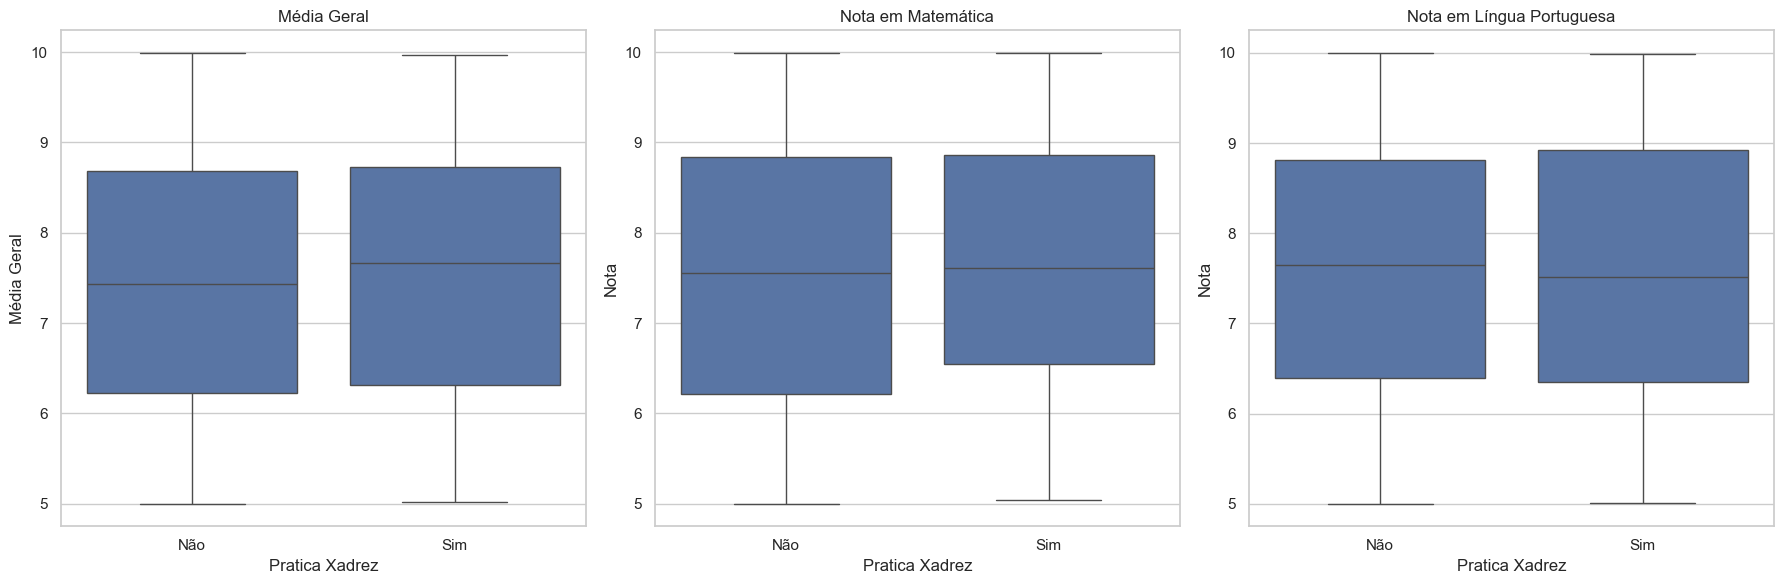

In [48]:
# Boxplot para média geral
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='Pratica_Xadrez', y='Qual foi sua média geral nas últimas três avaliações escolares?', ax=axes[0])
axes[0].set_title('Média Geral')
axes[0].set_xticklabels(['Não', 'Sim'])
axes[0].set_xlabel('Pratica Xadrez')
axes[0].set_ylabel('Média Geral')

# Boxplot para nota em Matemática
sns.boxplot(data=df, x='Pratica_Xadrez', y='Qual foi sua nota na última prova de Matemática?', ax=axes[1])
axes[1].set_title('Nota em Matemática')
axes[1].set_xticklabels(['Não', 'Sim'])
axes[1].set_xlabel('Pratica Xadrez')
axes[1].set_ylabel('Nota')

# Boxplot para nota em Língua Portuguesa
sns.boxplot(data=df, x='Pratica_Xadrez', y='Qual foi sua nota na última prova de Língua Portuguesa?', ax=axes[2])
axes[2].set_title('Nota em Língua Portuguesa')
axes[2].set_xticklabels(['Não', 'Sim'])
axes[2].set_xlabel('Pratica Xadrez')
axes[2].set_ylabel('Nota')

plt.tight_layout()
plt.show()

In [49]:
# Teste de hipótese (teste t)
mean_score = df['Qual foi sua média geral nas últimas três avaliações escolares?']
math_score = df['Qual foi sua nota na última prova de Matemática?']
portuguese_score = df['Qual foi sua nota na última prova de Língua Portuguesa?']

In [50]:
# Teste t para média geral
t_stat_mean, p_value_mean = ttest_ind(mean_score[df['Pratica_Xadrez'] == 1], 
                                      mean_score[df['Pratica_Xadrez'] == 0], 
                                      equal_var=False)

# Teste t para nota em Matemática
t_stat_math, p_value_math = ttest_ind(math_score[df['Pratica_Xadrez'] == 1], 
                                      math_score[df['Pratica_Xadrez'] == 0], 
                                      equal_var=False)

# Teste t para nota em Língua Portuguesa
t_stat_port, p_value_port = ttest_ind(portuguese_score[df['Pratica_Xadrez'] == 1], 
                                      portuguese_score[df['Pratica_Xadrez'] == 0], 
                                      equal_var=False)

In [51]:
# Exibindo os resultados estatísticos
print("Estatísticas Descritivas:")
print(stats)
print("\nMédias e Desvios Padrão:")
print(mean_std)
print("\nTeste t para Média Geral: t-statistic =", t_stat_mean, ", p-value =", p_value_mean)
print("Teste t para Nota em Matemática: t-statistic =", t_stat_math, ", p-value =", p_value_math)
print("Teste t para Nota em Língua Portuguesa: t-statistic =", t_stat_port, ", p-value =", p_value_port)

Estatísticas Descritivas:
               Qual foi sua média geral nas últimas três avaliações escolares?  \
                                                                         count   
Pratica_Xadrez                                                                   
0                                                          1614.0                
1                                                           386.0                

                                                                      \
                    mean       std   min     25%   50%     75%   max   
Pratica_Xadrez                                                         
0               7.444486  1.436655  5.00  6.2225  7.43  8.6875  9.99   
1               7.540855  1.458198  5.02  6.3150  7.67  8.7250  9.97   

               Qual foi sua nota na última prova de Matemática?            \
                                                          count      mean   
Pratica_Xadrez                                  

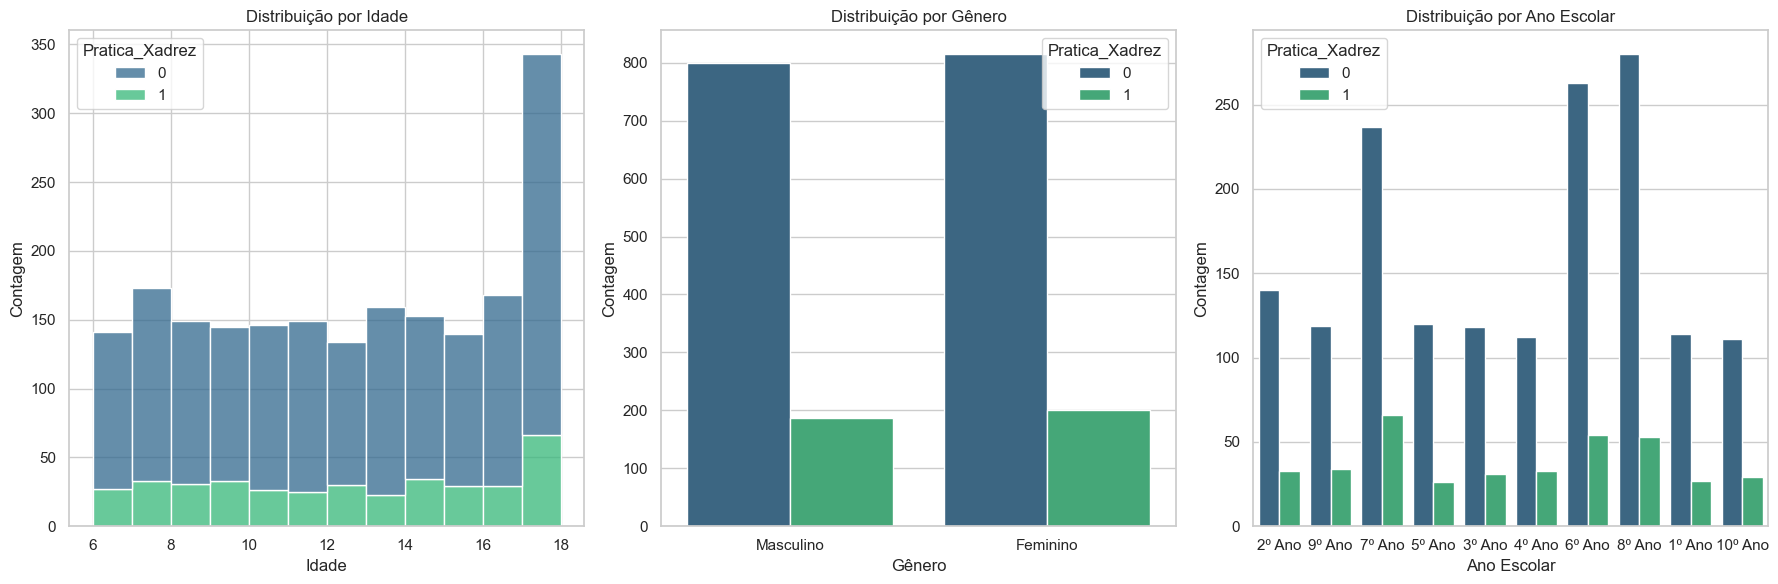

In [60]:
# Visualização da distribuição demográfica dos alunos que jogam xadrez
plt.figure(figsize=(18, 6))

# Distribuição por idade
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Idade', hue='Pratica_Xadrez', multiple='stack', palette='viridis')
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Gênero
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Gênero', hue='Pratica_Xadrez', palette='viridis')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Ano Escolar
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Ano Escolar', hue='Pratica_Xadrez', palette='viridis')
plt.title('Distribuição por Ano Escolar')
plt.xlabel('Ano Escolar')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()
